# CT Data to Blender via Notebooks

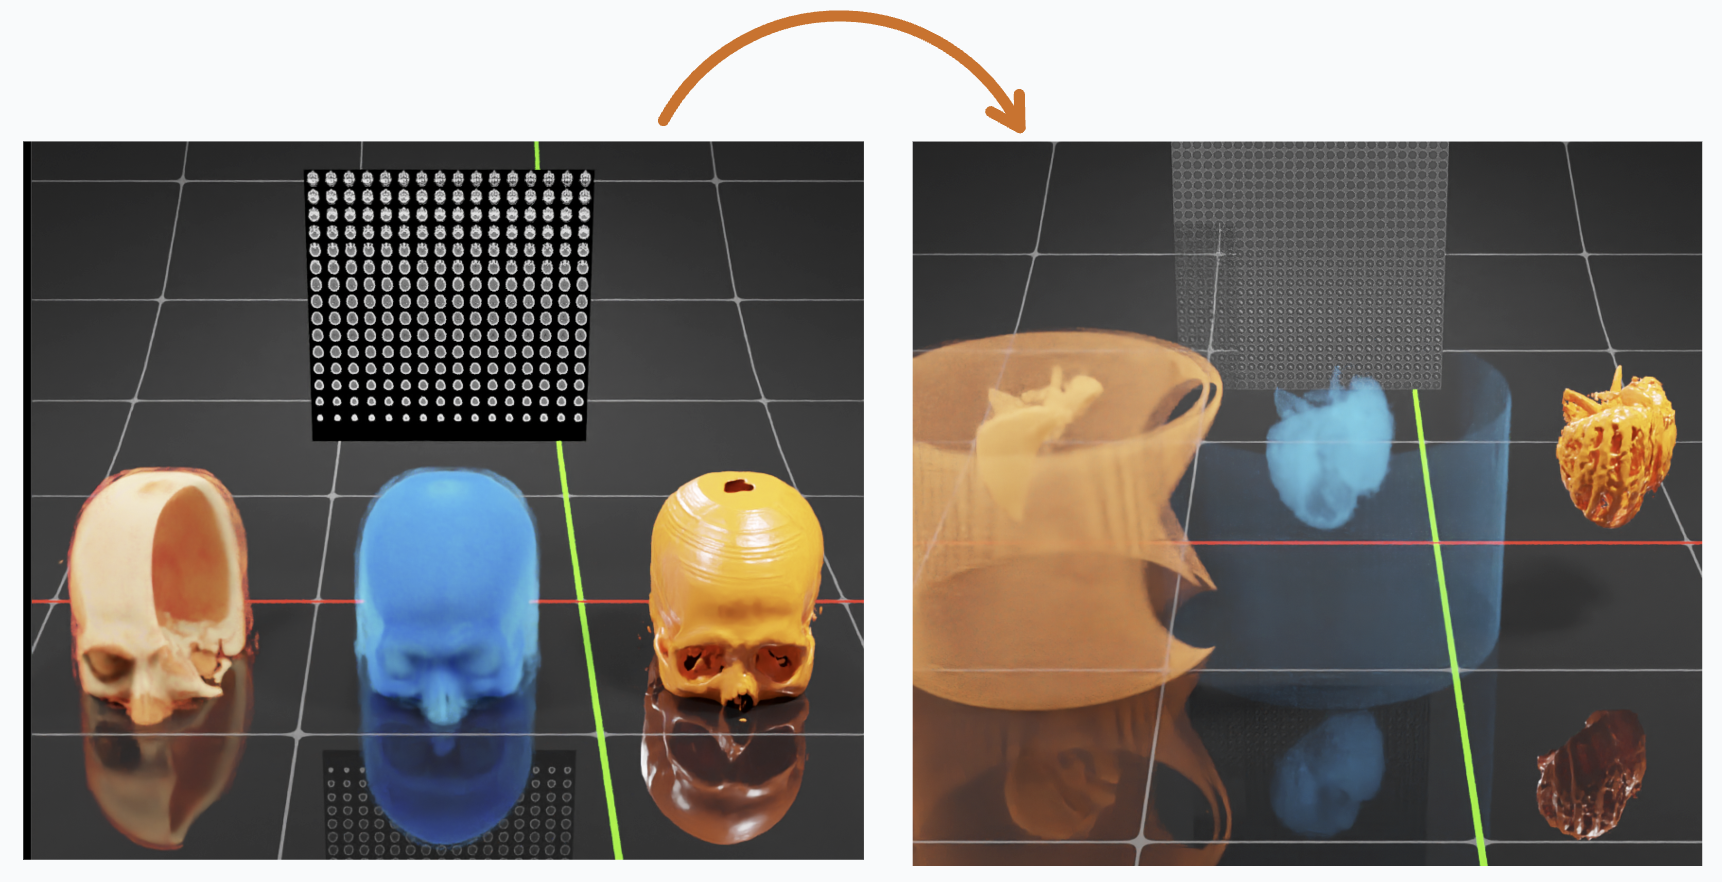

In [1]:
import bpy

# Open the .blend file
bpy.ops.wm.open_mainfile(filepath="Scan Data Visualizer V1.blend")

{'FINISHED'}

In [2]:
import bpy
from pathlib import Path

# Load the image
image_path = Path("./res_low_bombus_grid27x27.png").resolve()
my_image = bpy.data.images.load(str(image_path))

# Image is now stored in bpy.data.images and can be accessed later
print(f"Loaded image: {my_image.name}")

Loaded image: res_low_bombus_grid27x27.png


In [3]:
obj = bpy.context.scene.objects.get("Scan PNG")

mat = obj.active_material
nodes = mat.node_tree.nodes

for node in nodes:
    if node.type == 'TEX_IMAGE':
        node.image = my_image

In [4]:
obj = bpy.context.scene.objects.get("Scan Geometrynodes Visualizer.001")

gn_mod = obj.modifiers.get("GeometryNodes")

print("original skull:", gn_mod["Input_2"]) # rows
print("original skull:", gn_mod["Input_4"]) # image
print("original skull:", gn_mod["Input_10"]) # threshold

gn_mod["Input_2"] = 27
gn_mod["Input_4"] = my_image
gn_mod["Input_10"] = 0.19

obj.data.update()

original skull: 16
original skull: <bpy_struct, Image("Brain Scan Flipbook.png") at 0x1463d9620>
original skull: 0.5


In [5]:
obj = bpy.context.scene.objects.get("Scan Geometrynodes Visualizer")

gn_mod = obj.modifiers.get("GeometryNodes")

print("original skull:", gn_mod["Input_2"]) # rows
print("original skull:", gn_mod["Input_4"]) # image
print("original skull:", gn_mod["Input_7"]) # from_min

gn_mod["Input_2"] = 27
gn_mod["Input_4"] = my_image
gn_mod["Input_7"] = 0.14

obj.data.update()


original skull: 16
original skull: <bpy_struct, Image("Brain Scan Flipbook.png") at 0x1463d9620>
original skull: 0.0


In [6]:
import bpy

material = bpy.data.materials["Flipbook Volume Shader"]
nodes = material.node_tree.nodes
nodes

bpy.data.materials['Flipbook Volume Shader'].node_tree.nodes

In [7]:
flipbook_rows = nodes["Group"].inputs["Flipbook Rows"].default_value
print(f"Shaders skull: Flipbook Rows - {flipbook_rows}")
for node in nodes:
    if node.type == "TEX_IMAGE":
        print(f"Shaders skull image: {node.name}: {node.image}")
print(f"Shaders skull Density ColorRamp: {nodes['ColorRamp'].color_ramp.elements[0].position}")

flipbook_rows = nodes["Group"].inputs["Flipbook Rows"].default_value = 27
for node in nodes:
    if node.type == "TEX_IMAGE":
        node.image = my_image
nodes['ColorRamp'].color_ramp.elements[0].position = 0.1

Shaders skull: Flipbook Rows - 16.0
Shaders skull image: Image Texture: <bpy_struct, Image("Brain Scan Flipbook.png") at 0x1463d9620>
Shaders skull image: Image Texture.001: <bpy_struct, Image("Brain Scan Flipbook.png") at 0x1463d9620>
Shaders skull Density ColorRamp: 0.01100000087171793
